In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import patches 

In [2]:
def plot_abundance_diversity(diversity,abundance,orders,colors,title=""):
    diversity = diversity.T
    abundance = abundance.T
    
    # Get width of bar and error bar
    mean_diversity = diversity.mean(axis=1)
    std_diversity = diversity.std(axis=1)
    mean_abundance = abundance.mean(axis=1)
    std_abundance = abundance.std(axis=1)
    
    fig, axes = plt.subplots(ncols=2, nrows=1,constrained_layout=True,figsize=(6,2.2))
    # Plot diversity
    axes[0].yaxis.set_ticks_position("right")
    axes[0].barh(orders,mean_diversity.loc[orders].values,
                 xerr=std_diversity.loc[orders].values, 
                 ecolor='black',height=0.7,
                 capsize=2,color=colors,edgecolor='black')
    axes[0].set_xlim([1,18000])
    axes[0].invert_xaxis()
    axes[0].set_xscale("log")
    axes[0].set_xticks([1,10,100, 1000,10000])
    axes[0].set_xlabel("Detected genes",fontsize=14,fontweight="bold") 
    axes[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axes[0].set_yticklabels([])
    axes[0].xaxis.set_tick_params(labelsize=14,length=2)
    axes[0].yaxis.set_tick_params(length=0)
    
    # Plot abundance
    axes[1].barh(orders,mean_abundance.loc[orders].values,
                 xerr=std_abundance.loc[orders].values,
                 ecolor='black',height=0.7,
                 capsize=2,color=colors,edgecolor='black')
    axes[1].set_xlim([0,95])
    axes[1].set_xlabel("Fraction (%)",fontsize=14,fontweight="bold")
    axes[1].xaxis.set_tick_params(labelsize=14,length=2)
    axes[1].yaxis.set_tick_params(labelsize=14,length=0)
    axes[1].set_yticklabels([])

    fig.suptitle(title, fontsize=16,fontweight="bold")

In [3]:
def plot_legend(RNAs,colors):
    fig, ax = plt.subplots(figsize=(2,2))
    for i,(RNA,color) in enumerate(zip(RNAs,colors)):
        rect = patches.Rectangle((-0.5,i*1), 1, 0.5, linewidth=1, edgecolor="black", facecolor=color)
        ax.text(0.9,i*1+0.25,s=RNA,verticalalignment="center",fontsize=12)
        ax.add_patch(rect)
    ax.set_xlim([-1,5])
    ax.set_ylim([-1,5])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

### Load data
- `data/RNA-fractions.txt`: fraction of different RNA types, a sample a row, column for different RNA-types
- `data/n-detected-genes.txt`: # of detected genes of each RNA type in each sample

In [4]:
RNA_fractions = pd.read_csv("data/RNA-fractions.txt",sep="\t",index_col=0)
RNA_detected = pd.read_csv("data/n-detected-genes.txt",sep="\t",index_col=0)

- Orders: from bottom to top

In [5]:
orders = ['mRNA', 'lncRNA', 'srpRNA', 'pseudogene', 'circRNA']
colors = ["#BC3C29","#0072B5","#6F99AD","#909090","#EE4C97"]

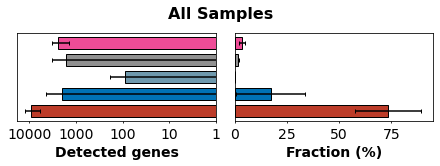

In [6]:
plot_abundance_diversity(RNA_detected,RNA_fractions,orders=orders,colors=colors,title="All Samples")
plt.savefig("abundance-diversity.pdf",bbox_inches="tight")

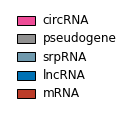

In [6]:
plot_legend(orders,colors)
plt.savefig("abundance-diversity-legend.pdf",bbox_inches="tight")

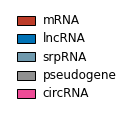

In [7]:
plot_legend(orders[::-1],colors[::-1])